<a href="https://colab.research.google.com/github/divaDseidnA/stable-diffusion-webui/blob/master/p1_Stable_Diffusion_ProductSnapAI_Untrained_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Part 1: Stable Diffusion Inference 🎇

In [ ]:
!cd /content/
!git clone https://github.com/huggingface/diffusers.git
!pip install ./diffusers
!pip install -U -r /content/diffusers/examples/text_to_image/requirements.txt

Cloning into 'diffusers'...
remote: Enumerating objects: 22004, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 22004 (delta 147), reused 144 (delta 58), pack-reused 21738
Receiving objects: 100% (22004/22004), 14.87 MiB | 24.06 MiB/s, done.
Resolving deltas: 100% (15692/15692), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 13.4 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.15.0.dev0-py3-none-any.whl size=822559 sha256=b7a4ac2640ee106b997a1f432ccb9133788f8bedad58fc8856f2c9373d296ae7
  Stored in directory: /tmp/pip-ephem-wheel-cache-xiy5lww9/wheels/bd/1c/ea/a9c409b587aa6f3abca1bf1ce8eb592b2b541e5f26f5a4f44b
Successfully bui

## Stable Diffusion V1 Inference Testing

Let's test out version 1.2 of the original model without any finetuning.

In [ ]:
from diffusers import StableDiffusionPipeline
import torch# Stable Diffusion V1
from PIL import Image

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

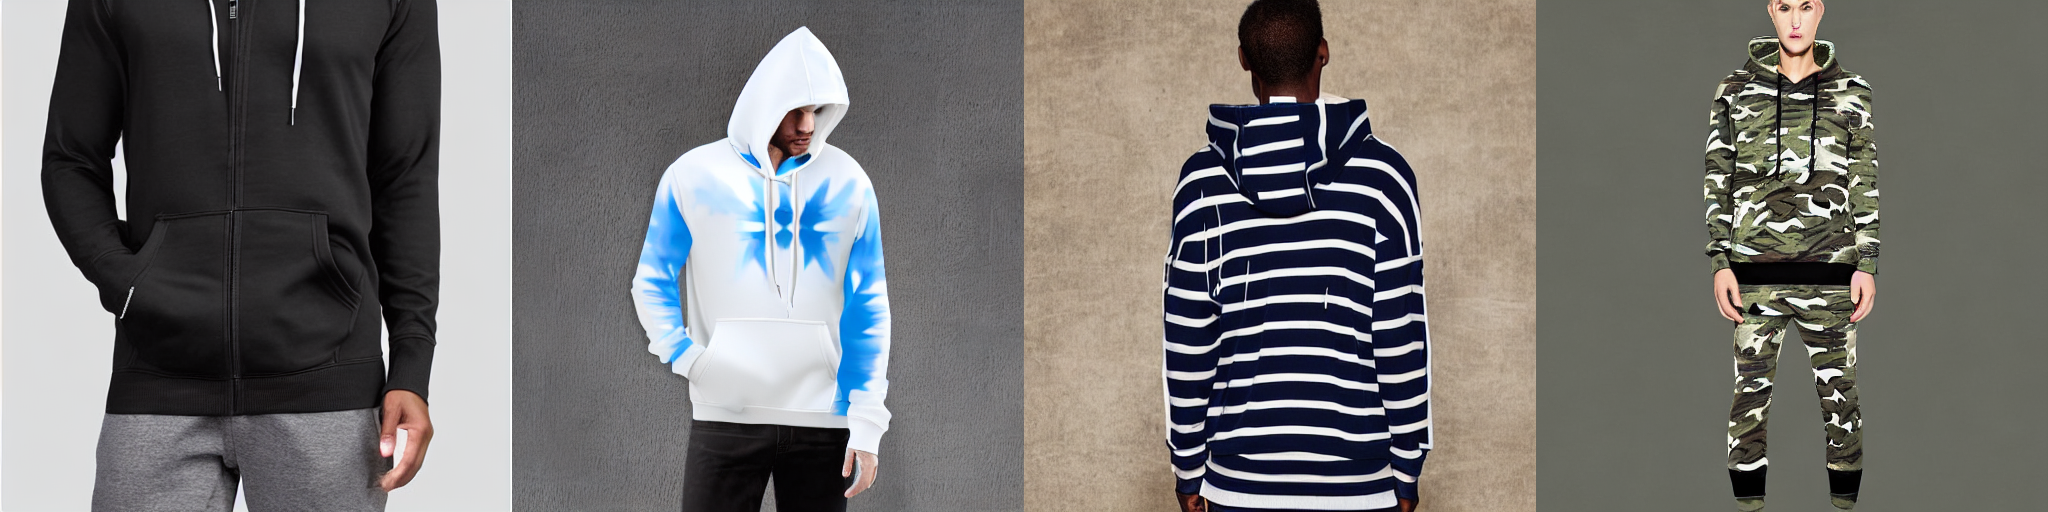

In [ ]:
# Stable Diffusion V1
model_path = "CompVis/stable-diffusion-v1-2"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="black hoodie with a front half zipper by martin valen").images[0]
image1.save("ProductSnapAI_panel_1.png")

image2 = pipe(prompt="white hoodie with a blue design by martin valen").images[0]
image2.save("ProductSnapAI_panel_2.png")

image3 = pipe(prompt="stripped hoodie by martin valen").images[0]
image3.save("ProductSnapAI_panel_3.png")

image4 = pipe(prompt="camouflage hoodie by martin valen").images[0]
image4.save("ProductSnapAI_panel_4.png")

# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid

## Stable Diffusion V2 Inference Testing

Let's test out version 2.1 of the original model without any finetuning.

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

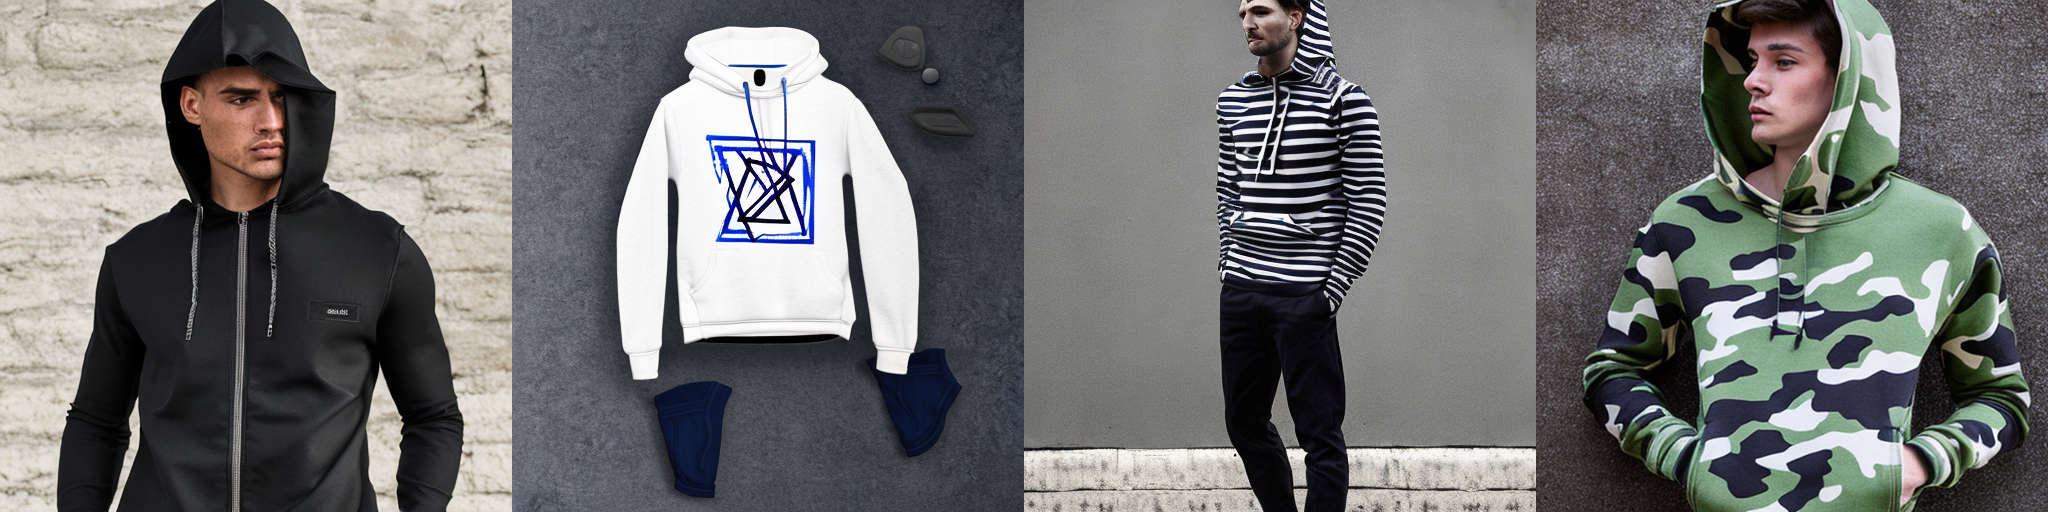

In [ ]:
# Stable Diffusion V2
model_path = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="black hoodie with a front half zipper by martin valen").images[0]
image1.save("ProductSnapAI_panel_1.png")

image2 = pipe(prompt="white hoodie with a blue design by martin valen").images[0]
image2.save("ProductSnapAI_panel_2.png")

image3 = pipe(prompt="stripped hoodie by martin valen").images[0]
image3.save("ProductSnapAI_panel_3.png")

image4 = pipe(prompt="camouflage hoodie by martin valen").images[0]
image4.save("ProductSnapAI_panel_4.png")

# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid
